<a href="https://colab.research.google.com/github/Michael-Siri/AI-CAP4630/blob/master/HW_2/Homework2Question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Michael Siripongpibul
#CAP4630 Homework 2 Question 2

# This code generates random m pairs of (x,y), displays them, and the predictions of the models after tuning them with the parameters of the gradient desecent with 2 weights


In [0]:

import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Generate m random pairs (x, y)

In [0]:


m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.rand(m, 1)
z = y

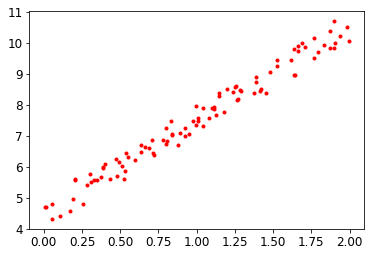

In [4]:
plt.plot(X, y, "r.")

plt.show()


In [0]:
# number of epochs
epochs = 20
# learning rate
lr = 0.01
# fix initial random weight for gradient descent (batch gradient descent)
np.random.seed(42)
initial_weight = np.random.randn(2, 1) 

# Mini-batch Gradient Descent

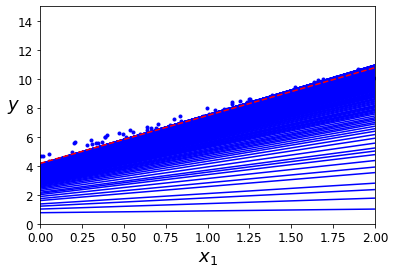

array([[4.09669953],
       [3.34571025]])

In [6]:
#added an extra weight 
#predictions and descent


X_b = np.column_stack([np.ones((m, 1)), X])
X_new = np.array([[0], [2]])
X_new_b = np.column_stack([np.ones((2, 1)), X_new])


Z_b = np.column_stack([np.ones((m, 1)), z])
Z_new = np.array([[0], [2]])
Z_new_b = np.column_stack([np.ones((2, 1)), Z_new])

weight = initial_weight
weight2 = initial_weight

weight_path_mgd = []
batch_size = 4

weight_path_mgd.append(weight)
for epoch in range(epochs):
  shuffled_indices = np.random.permutation(m)
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  z_shuffled = z[shuffled_indices]
  for i in range(0, m, batch_size):
    xi = X_b_shuffled[i:i+batch_size]
    yi = y_shuffled[i:i+batch_size]
    zi = z_shuffled[i:i+batch_size]
    gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
    gradient2 = 1 / batch_size * zi.T.dot(xi.dot(weight2) - yi)
    weight = weight - lr * gradient
    weight2 = weight2 - lr * gradient2
    weight_path_mgd.append((weight+weight2)/2)

    y_predict = (X_new_b.dot(weight)  + Z_new_b.dot(weight2))/2
    plt.plot(X_new, y_predict, "b-")  

plt.plot(X, y, "b.")
y_predict = X_new_b.dot(weight)                    
plt.plot(X_new, y_predict, "r--")   

plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                                              
plt.show()           



weight_path_mgd[-1]

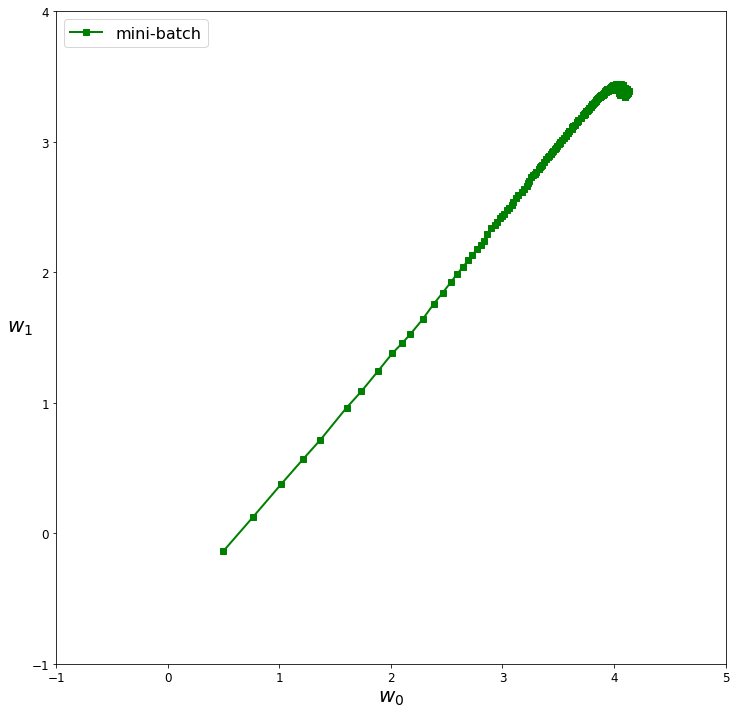

In [7]:
#Visual

weight_path_mgd = np.array(weight_path_mgd)
plt.figure(figsize=(12,12))
plt.plot(weight_path_mgd[:, 0], weight_path_mgd[:, 1], "g-s", linewidth=2, label="mini-batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$w_0$", fontsize=20)
plt.ylabel(r"$w_1$   ", fontsize=20, rotation=0)
plt.axis([-1, 5, -1, 4])
plt.show()